In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [2]:
model = torch.load('data_storage/CNN_L16_beta.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.1150,  0.2896, -0.5591, -1.0493],
                        [-0.3246,  0.3497,  0.5051, -0.5417],
                        [-0.6192,  0.6018,  0.6735,  0.6919],
                        [ 0.1456,  0.3314,  0.3347,  0.5640]]],
              
              
                      [[[-0.0942, -0.1957, -0.4545, -0.2027],
                        [-0.4629, -0.5314, -0.3367, -0.3210],
                        [-0.5025, -0.6102, -0.5572, -0.4689],
                        [-0.4349, -0.5294, -0.4850, -0.2118]]],
              
              
                      [[[-0.2595, -0.4715, -0.2729,  0.4141],
                        [-0.3398, -0.0702,  0.9069,  0.3594],
                        [ 0.4588,  0.1453, -0.2461, -0.2223],
                        [-0.5209,  0.8320,  0.3295, -0.5364]]],
              
              
                      [[[-0.3537, -0.5125, -0.5498, -0.4917],
                        [-0.3899, -0.7135, -0.5503, -0.6389],
     

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.1150,  0.2896, -0.5591, -1.0493],
          [-0.3246,  0.3497,  0.5051, -0.5417],
          [-0.6192,  0.6018,  0.6735,  0.6919],
          [ 0.1456,  0.3314,  0.3347,  0.5640]]],


        [[[-0.0942, -0.1957, -0.4545, -0.2027],
          [-0.4629, -0.5314, -0.3367, -0.3210],
          [-0.5025, -0.6102, -0.5572, -0.4689],
          [-0.4349, -0.5294, -0.4850, -0.2118]]],


        [[[-0.2595, -0.4715, -0.2729,  0.4141],
          [-0.3398, -0.0702,  0.9069,  0.3594],
          [ 0.4588,  0.1453, -0.2461, -0.2223],
          [-0.5209,  0.8320,  0.3295, -0.5364]]],


        [[[-0.3537, -0.5125, -0.5498, -0.4917],
          [-0.3899, -0.7135, -0.5503, -0.6389],
          [-0.2621, -0.4979, -0.3997, -0.4197],
          [-0.4791, -0.2994, -0.4792, -0.2773]]],


        [[[ 0.3146,  0.2686, -0.2947,  0.7707],
          [-0.0738, -0.6844, -0.6767,  0.6492],
          [ 0.5925,  0.0766,  0.3710, -0.5578],
          [-0.3466,  0.1728, -0.2023,  0.6466]]]])

In [4]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.detach().cpu().numpy()

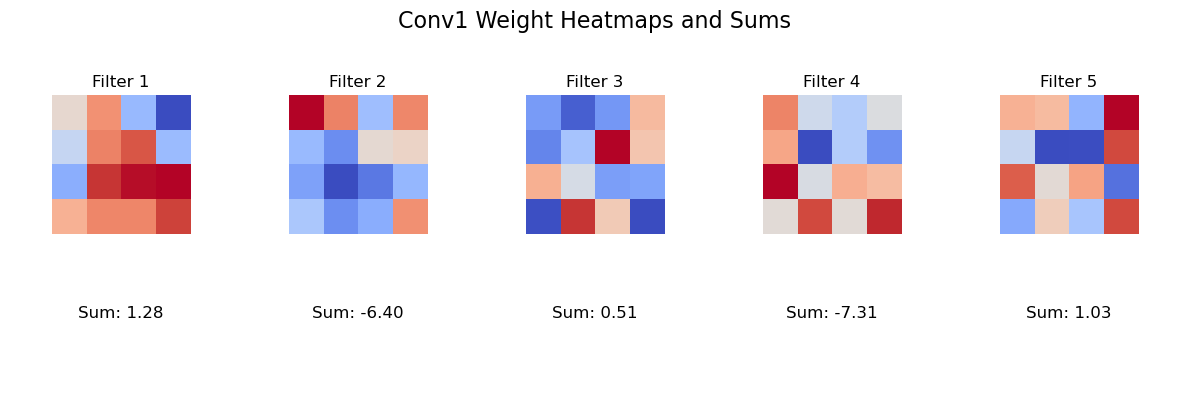

In [5]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.1968,  0.1537, -0.0631,  ...,  0.2290,  0.3570,  0.3577],
        [ 0.3499,  0.2077,  0.3341,  ..., -0.0635,  0.3763,  0.2901],
        [ 0.2249,  0.1875,  0.2959,  ...,  0.0234, -0.0677,  0.1149],
        ...,
        [-0.0719, -0.0701, -0.0749,  ..., -0.0588, -0.0668, -0.0556],
        [-0.0709, -0.0692, -0.0749,  ..., -0.0590, -0.0657, -0.0562],
        [-0.4607,  0.1333, -0.1047,  ..., -0.0019, -0.0243, -0.3068]])

In [7]:
fc_weight.size()

torch.Size([25, 80])

In [8]:
# NumPy配列に変換
fc_weight_np = fc_weight.detach().cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [9]:
fc_weight_np_square

array([[ 0.19683278,  0.34993646,  0.22493733, ..., -0.07188074,
        -0.07091886, -0.460719  ],
       [ 0.15368727,  0.20769058,  0.18752483, ..., -0.07006338,
        -0.06921932,  0.13331954],
       [-0.06306052,  0.33406603,  0.29591545, ..., -0.07488637,
        -0.07485462, -0.10465402],
       ...,
       [ 0.22897473, -0.06346506,  0.02336722, ..., -0.05882154,
        -0.0589532 , -0.00185408],
       [ 0.35699525,  0.3762572 , -0.06773363, ..., -0.06681782,
        -0.06571666, -0.02430072],
       [ 0.3576631 ,  0.2900694 ,  0.11490669, ..., -0.05564649,
        -0.05622465, -0.306807  ]], dtype=float32)

In [10]:
fc_weight_np_square.shape

(80, 25)

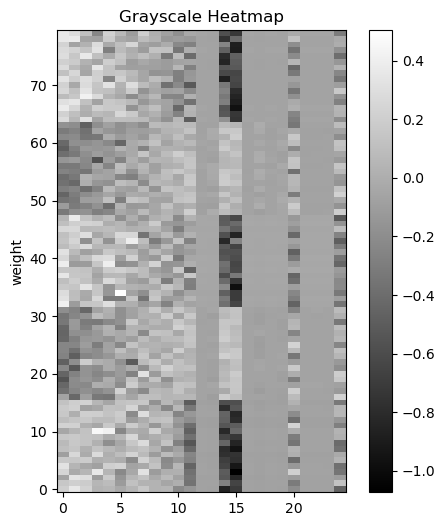

In [11]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.5, origin='lower')
#plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.03, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [12]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -0.8620377 ,  -1.29671   ,  -0.7091541 ,  -0.5119067 ,
         0.49535626,  -0.5948779 ,   0.5632608 ,  -0.26800823,
         0.77932155,  -1.7121469 ,  -3.3637648 ,  -7.116214  ,
        -4.906398  ,  -4.9184427 , -22.133398  , -29.60566   ,
        -4.870803  ,  -4.900283  ,  -4.88995   ,  -4.9043546 ,
        -9.348757  ,  -4.872367  ,  -4.862441  ,  -4.8861017 ,
        -8.603916  ], dtype=float32)

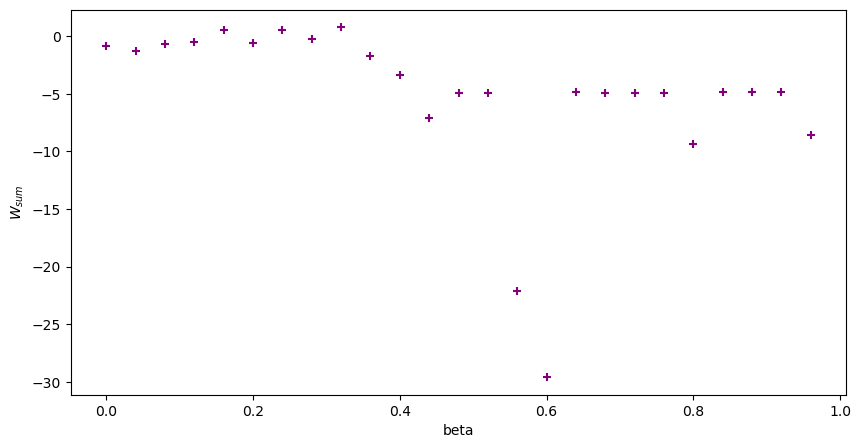

In [13]:
x = [x*0.04 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('beta')
plt.ylabel('$W_{sum}$')

plt.show()

In [14]:
for j in range(80):
    print(fc_weight_np_square[j,21])

-0.071635194
-0.06981806
-0.0745059
-0.06689647
-0.06768139
-0.07074275
-0.07793627
-0.06563491
-0.06712385
-0.06524974
-0.06384676
-0.07823732
-0.07733438
-0.066295184
-0.067024074
-0.07971194
-0.06563258
-0.06800662
-0.055379298
-0.06298219
-0.065524034
-0.059809104
-0.058325205
-0.06147316
-0.06512563
-0.062640175
-0.063205905
-0.060688447
-0.061009042
-0.06759961
-0.06900759
-0.056787837
-0.049741816
-0.042798504
-0.053344406
-0.047682002
-0.042147003
-0.045618396
-0.036709387
-0.043873373
-0.033400755
-0.04670669
-0.04343505
-0.041694
-0.03981479
-0.04549563
-0.0355293
-0.04193247
-0.072029375
-0.07373661
-0.06376535
-0.06807021
-0.070477396
-0.066198416
-0.06403315
-0.06730828
-0.06916099
-0.06693583
-0.069762595
-0.06966203
-0.06783942
-0.07249606
-0.07389725
-0.06607164
-0.052854884
-0.062093455
-0.05333725
-0.059690647
-0.060637288
-0.059523772
-0.057116598
-0.0583078
-0.060364574
-0.06362031
-0.06855542
-0.05837981
-0.052956242
-0.05870075
-0.066271044
-0.055718347


In [15]:
fc_weight_np_square[0,24]

-0.460719